## Data Import

In [1]:
from CIDER import ChemicalDatasetComparator

In [2]:
cider = ChemicalDatasetComparator()

In [3]:
testdict = cider.import_as_data_dict('data2')

## Overview Dataset Size

In [4]:
cider.get_number_of_molecules(testdict)

Number of molecules in no_lipinski.sdf: 100
Number of molecules in set_chlorbenzene.sdf: 100
Number of molecules in set_phenole.sdf: 100


{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2a7050fb3b0>,
  'number_of_molecules': 100},
 'set_chlorbenzene.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2a7738d6d60>,
  'number_of_molecules': 100},
 'set_phenole.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2a7675e8cc0>,
  'number_of_molecules': 100}}

## Overview molecules (visualization of molecules)

{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2a7050fb3b0>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400>},
 'set_chlorbenzene.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2a7738d6d60>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400>},
 'set_phenole.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2a7675e8cc0>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400>}}

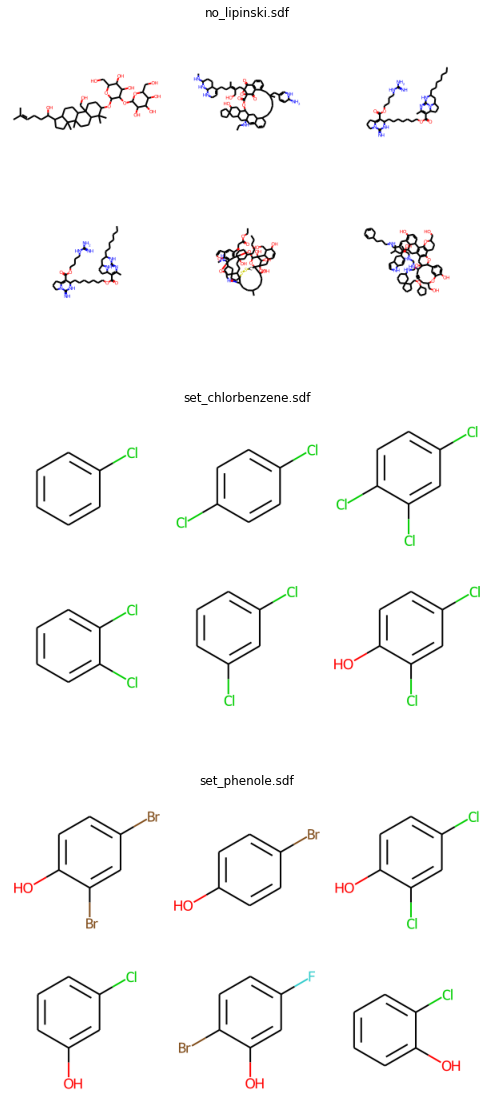

In [5]:
cider.draw_molecules(testdict, number_of_mols = 6)

## Get  Database ID

In [6]:
cider.get_database_id(testdict, 'coconut_id')

{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2aa72dc1770>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400>,
  'coconut_id_keyname': ['CNP0125965',
   'CNP0436865',
   'CNP0211232',
   'CNP0436877',
   'CNP0096266',
   'CNP0153122',
   'CNP0271735',
   'CNP0097989',
   'CNP0235956',
   'CNP0152948',
   'CNP0280674',
   'CNP0059407',
   'CNP0084420',
   'CNP0073501',
   'CNP0307371',
   'CNP0436931',
   'CNP0103963',
   'CNP0436939',
   'CNP0436955',
   'CNP0051053',
   'CNP0436958',
   'CNP0436964',
   'CNP0082413',
   'CNP0063891',
   'CNP0436979',
   'CNP0437007',
   'CNP0000456',
   'CNP0437066',
   'CNP0257632',
   'CNP0081665',
   'CNP0437077',
   'CNP0426966',
   'CNP0236088',
   'CNP0058972',
   'CNP0319508',
   'CNP0437113',
   'CNP0000703',
   'CNP0066154',
   'CNP0147861',
   'CNP0052692',
   'CNP0437141',
   'CNP0212788',
   'CNP0391402',
   'CNP0144127',
   'CNP0437153

## Get Chemical Identifier

In [6]:
cider.get_identifier_list_key(testdict)

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Proton(s) added/removed; Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Omitted undefined stereo

[11:28:08] WARNING: Proton(s) added/removed; Omitted un

{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2a7050fb3b0>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400>,
  'identifier_list': ['InChI=1S/C41H70O13/c1-21(2)8-7-9-24(45)22-12-15-39(5)23(22)10-11-28-40(39,6)16-13-27-38(3,4)29(14-17-41(27,28)20-44)53-37-35(33(49)31(47)26(19-43)52-37)54-36-34(50)32(48)30(46)25(18-42)51-36/h8,22-37,42-50H,7,9-20H2,1-6H3',
   'InChI=1S/C64H88N6O7/c1-5-69-62-33-42-14-10-13-40-12-6-7-24-60(3,30-39-18-21-52(65)68-36-39)31-43-15-11-16-47-54(43)57(74)64(59(75)76-55(50(62)28-48(40)42)49-29-51(72)61(25-8-9-26-61)32-44(49)34-62)63(77-64,56(47)73)35-45(37-71)38(2)17-19-41-23-27-67-58-46(41)20-22-53(66-4)70-58/h10-11,14-16,18,21,23,33,36,40,44,46,48-53,55,58,66-72H,5-9,12-13,17,19-20,22,24-32,34-35,37,65H2,1-4H3/b45-38-',
   'InChI=1S/C38H63N9O4/c1-3-4-5-7-10-16-27-25-28-19-20-31-32(26(2)43-38(44-27)47(28)31)34(48)50-23-13-9-6-8-11-17-29-33(30-18-15-22-46(30)3

## Testing for duplicates

In [8]:
cider.get_duplicate_key(testdict)

Number of duplicates in no_lipinski.sdf: 0
Number of duplicates in set_chlorbenzene.sdf: 0
Number of duplicates in set_phenole.sdf: 2


{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2aa72dc1770>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400>,
  'coconut_id_keyname': ['CNP0125965',
   'CNP0436865',
   'CNP0211232',
   'CNP0436877',
   'CNP0096266',
   'CNP0153122',
   'CNP0271735',
   'CNP0097989',
   'CNP0235956',
   'CNP0152948',
   'CNP0280674',
   'CNP0059407',
   'CNP0084420',
   'CNP0073501',
   'CNP0307371',
   'CNP0436931',
   'CNP0103963',
   'CNP0436939',
   'CNP0436955',
   'CNP0051053',
   'CNP0436958',
   'CNP0436964',
   'CNP0082413',
   'CNP0063891',
   'CNP0436979',
   'CNP0437007',
   'CNP0000456',
   'CNP0437066',
   'CNP0257632',
   'CNP0081665',
   'CNP0437077',
   'CNP0426966',
   'CNP0236088',
   'CNP0058972',
   'CNP0319508',
   'CNP0437113',
   'CNP0000703',
   'CNP0066154',
   'CNP0147861',
   'CNP0052692',
   'CNP0437141',
   'CNP0212788',
   'CNP0391402',
   'CNP0144127',
   'CNP0437153

## Comparison of molecules and visualization

In [9]:
cider.get_shared_molecules_key(testdict)

Number of molecules that can be found in all datasets: 0


{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2aa72dc1770>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400>,
  'coconut_id_keyname': ['CNP0125965',
   'CNP0436865',
   'CNP0211232',
   'CNP0436877',
   'CNP0096266',
   'CNP0153122',
   'CNP0271735',
   'CNP0097989',
   'CNP0235956',
   'CNP0152948',
   'CNP0280674',
   'CNP0059407',
   'CNP0084420',
   'CNP0073501',
   'CNP0307371',
   'CNP0436931',
   'CNP0103963',
   'CNP0436939',
   'CNP0436955',
   'CNP0051053',
   'CNP0436958',
   'CNP0436964',
   'CNP0082413',
   'CNP0063891',
   'CNP0436979',
   'CNP0437007',
   'CNP0000456',
   'CNP0437066',
   'CNP0257632',
   'CNP0081665',
   'CNP0437077',
   'CNP0426966',
   'CNP0236088',
   'CNP0058972',
   'CNP0319508',
   'CNP0437113',
   'CNP0000703',
   'CNP0066154',
   'CNP0147861',
   'CNP0052692',
   'CNP0437141',
   'CNP0212788',
   'CNP0391402',
   'CNP0144127',
   'CNP0437153

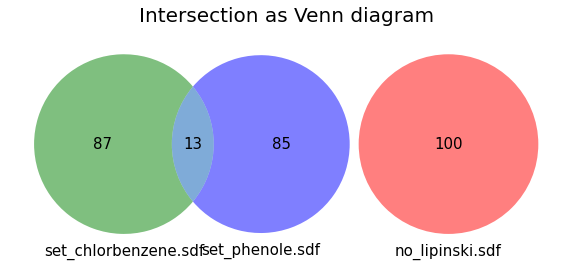

In [10]:
cider.visualize_intersection(testdict)

## Get Descriptor

In [7]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [8]:
cider.get_descriptor_list_key(testdict, Descriptors.MolWt, 'Molecular Weight')
cider.get_descriptor_list_key(testdict, Descriptors.MolLogP, 'LogP')
cider.get_descriptor_list_key(testdict, rdMolDescriptors.CalcMolFormula, 'Molecular Formula')
cider.get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'Number of H-Donors')
cider.get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')
cider.get_descriptor_list_key(testdict, Descriptors.NumHAcceptors, 'Number of H-Acceptors')
cider.get_descriptor_list_key(testdict, Descriptors.Chi1, 'Chi Connectivity Indices')
cider.get_descriptor_list_key(testdict, Descriptors.Kappa1, 'Kappa Shape Indices')
testdict['set_phenole.sdf'].keys()

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'identifier_list', 'Molecular Weight', 'LogP', 'Molecular Formula', 'Number of H-Donors', 'Number of Rings', 'Number of H-Acceptors', 'Chi Connectivity Indices', 'Kappa Shape Indices'])

## Get descriptor value with database ID

In [13]:
cider.get_value_from_id(testdict, 'CNP0291002', 'LogP')

Molecule not found in no_lipinski.sdf
Molecule found in set_chlorbenzene.sdf
LogP value for ID CNP0291002: 1.9537999999999995
Molecule found in set_phenole.sdf
LogP value for ID CNP0291002: 1.9537999999999995


## Descriptor binning and visualization

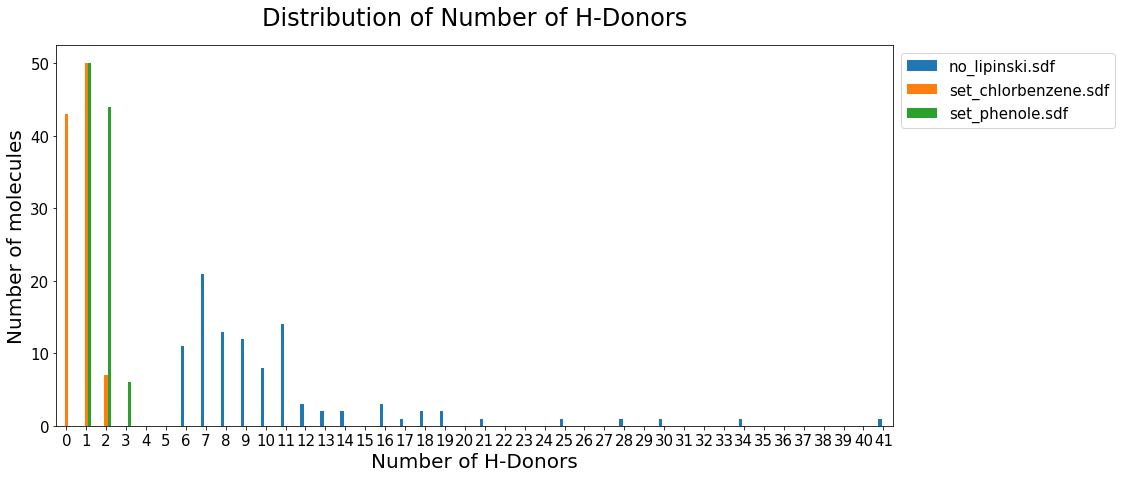

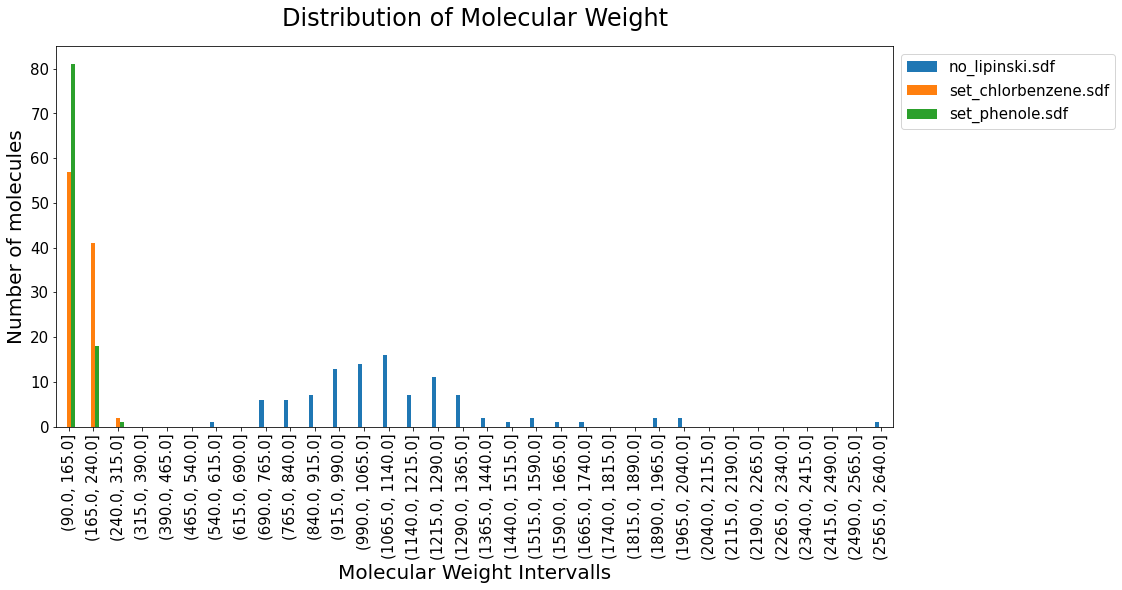

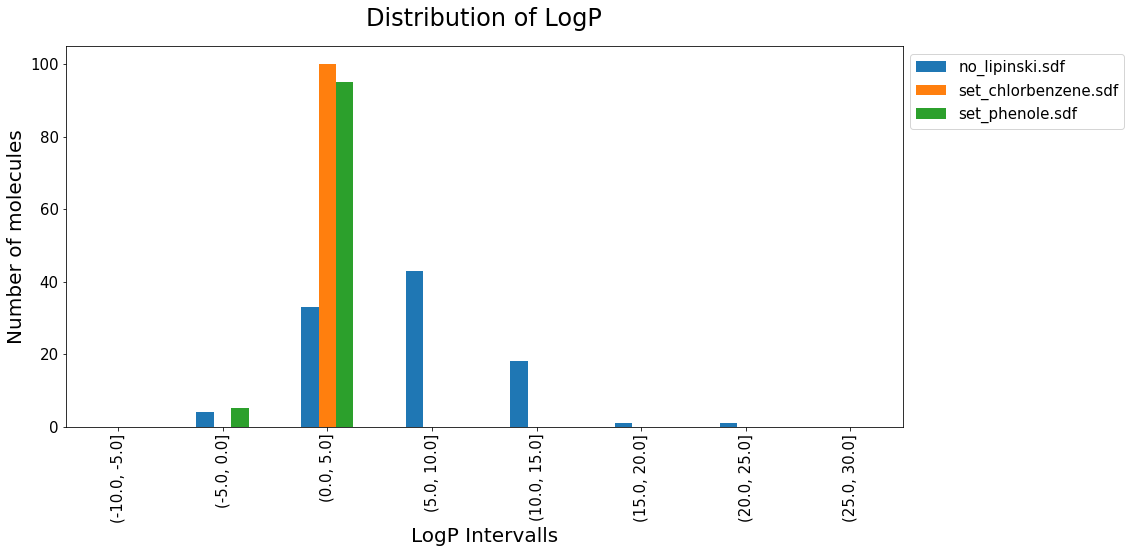

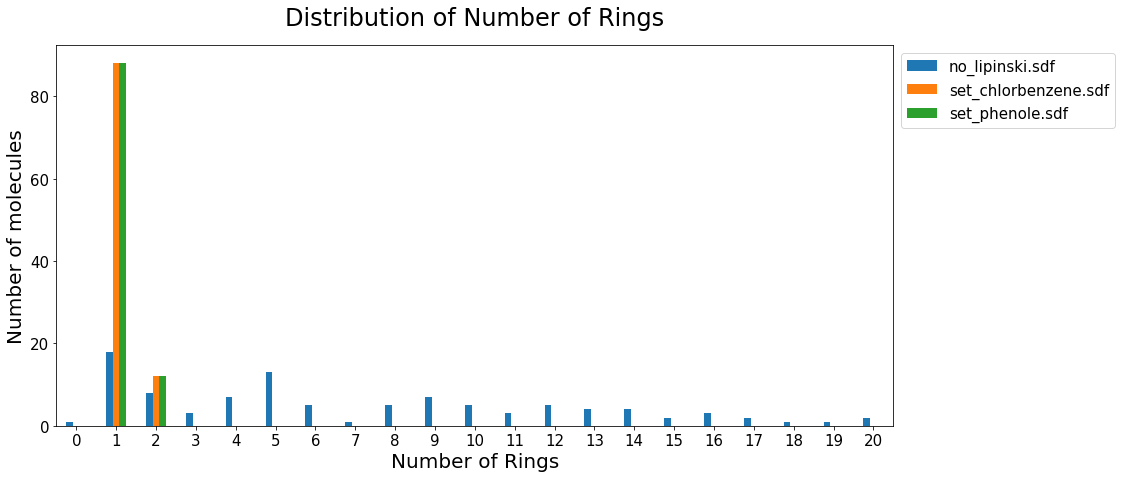

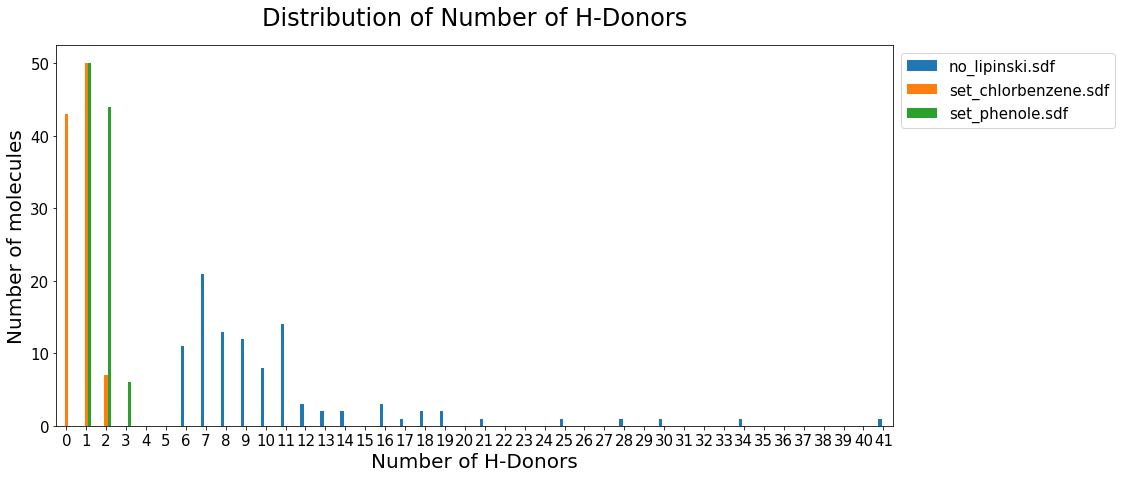

In [13]:
cider.descriptor_counts_and_plot(testdict, 'Molecular Weight', 75)
cider.descriptor_counts_and_plot(testdict, 'LogP', 5)
cider.descriptor_counts_and_plot(testdict, 'Number of Rings')
cider.descriptor_counts_and_plot(testdict, 'Number of H-Donors')

## Lipinski Rule of 5 with visualization

In [14]:
cider.get_lipinski_key(testdict)

{'no_lipinski.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x2a7050fb3b0>,
  'number_of_molecules': 100,
  'molecule_picture': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x400>,
  'identifier_list': ['InChI=1S/C41H70O13/c1-21(2)8-7-9-24(45)22-12-15-39(5)23(22)10-11-28-40(39,6)16-13-27-38(3,4)29(14-17-41(27,28)20-44)53-37-35(33(49)31(47)26(19-43)52-37)54-36-34(50)32(48)30(46)25(18-42)51-36/h8,22-37,42-50H,7,9-20H2,1-6H3',
   'InChI=1S/C64H88N6O7/c1-5-69-62-33-42-14-10-13-40-12-6-7-24-60(3,30-39-18-21-52(65)68-36-39)31-43-15-11-16-47-54(43)57(74)64(59(75)76-55(50(62)28-48(40)42)49-29-51(72)61(25-8-9-26-61)32-44(49)34-62)63(77-64,56(47)73)35-45(37-71)38(2)17-19-41-23-27-67-58-46(41)20-22-53(66-4)70-58/h10-11,14-16,18,21,23,33,36,40,44,46,48-53,55,58,66-72H,5-9,12-13,17,19-20,22,24-32,34-35,37,65H2,1-4H3/b45-38-',
   'InChI=1S/C38H63N9O4/c1-3-4-5-7-10-16-27-25-28-19-20-31-32(26(2)43-38(44-27)47(28)31)34(48)50-23-13-9-6-8-11-17-29-33(30-18-15-22-46(30)3

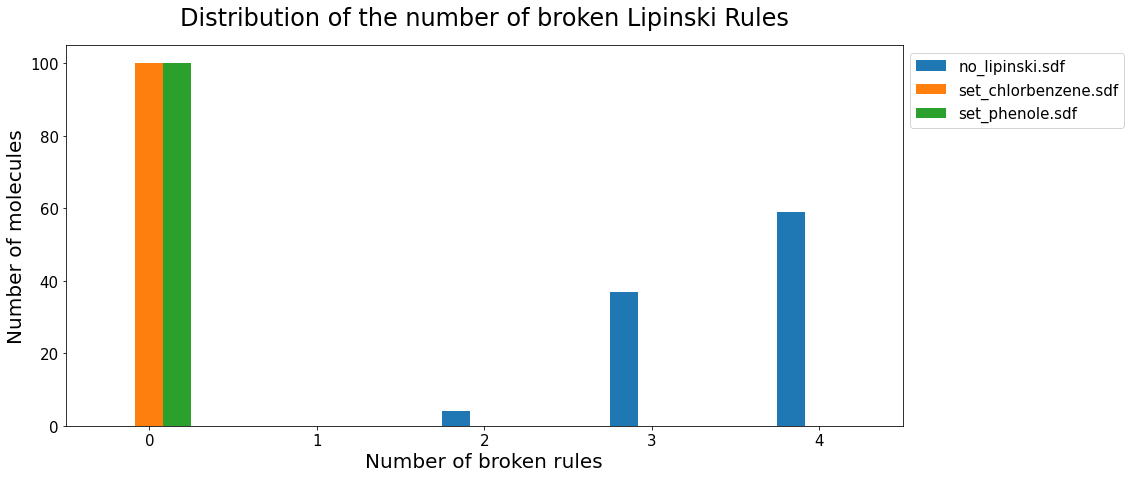

In [16]:
lp = cider.lipinski_plot(testdict)

## Chemical Space Visualization

C:\Users\xi59vek\.conda\envs\CDC\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\xi59vek\.conda\envs\CDC\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


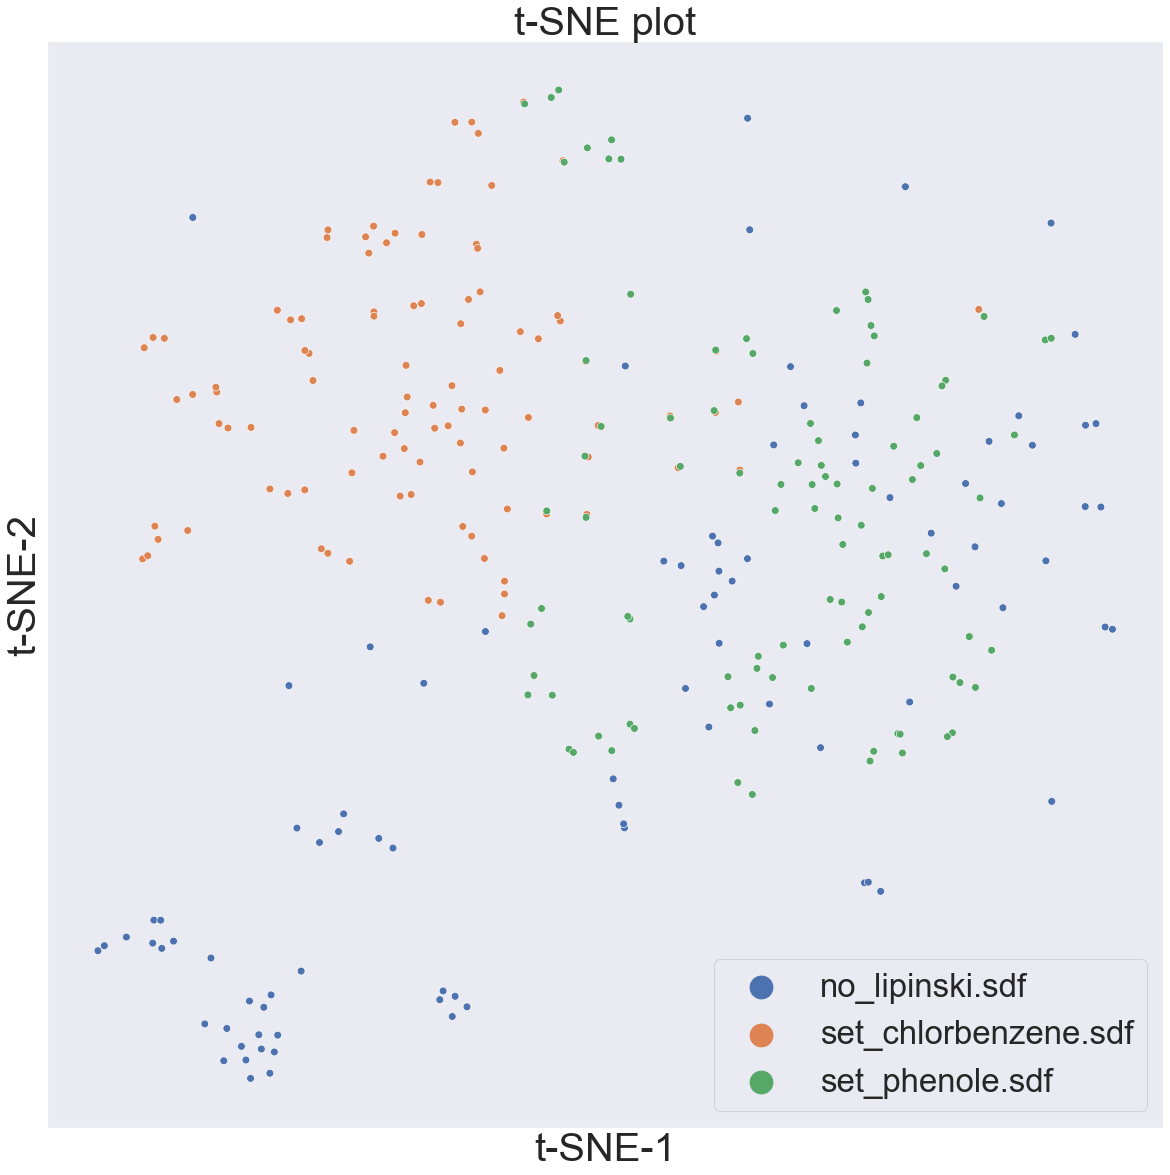

In [18]:
cider.chemical_space_visualization(testdict, fp_bits = 1024, dimension_reduction = 'tsne', interactive = False)

## Export

In [19]:
cider.export_single_dict_values(testdict)      
cider.export_all_picture_pdf()

no_lipinski.sdf : 11 exported descriptor values
set_chlorbenzene.sdf : 11 exported descriptor values
set_phenole.sdf : 11 exported descriptor values
